In order to run this notebook locally you will need
- a local instsallation of feltor: follow the quick-start guide https://github.com/feltor-dev/feltor (we do need jsoncpp and netcdf, but not glfw, and a link to path/to/feltor/inc/dg in home/include)
- a local installation of simplesimdb: follow the quick-start guide https://github.com/mwiesenberger/simplesimdb
- a local installation of feltorutilities (for parameters): https://github.com/mwiesenberger/feltorutilities
- to compile the cpp codes in this repository: type make in a shell

### Plasma two-fluid equations with temperature

We investigate the two-fluid equations with temperature (also known as two-fluid Euler-Poisson system)

 \begin{align}
     \frac{\partial }{\partial t} n_e&= - \frac{\partial}{\partial x} (u_en_e )  \\
     \frac{\partial }{\partial t} n_i&= - \frac{\partial}{\partial x} (u_in_i )   \\   
    \frac{\partial }{\partial t} n_eu_e&= - \frac{\partial}{\partial x} n_eu_e^2 - \frac{1}{\mu_e}\frac{\partial}{\partial x} T_e n_e - \frac{z_e}{\mu_e} n_e\frac{\partial}{\partial x} \phi + \frac{R}{\mu_e}+ \frac{\partial}{\partial x} \left( \nu_{u,e}\frac{\partial}{\partial x} u_e\right)\\
     \frac{\partial }{\partial t} n_iu_i&= - \frac{\partial}{\partial x} n_iu_i^2 - \frac{1}{\mu_i}\frac{\partial}{\partial x} n_iT_i - \frac{z_i}{\mu_i}n_i\frac{\partial}{\partial x} \phi - \frac{R}{\mu_i} + \frac{\partial}{\partial x} \left( \nu_{u,i}\frac{\partial}{\partial x} u_i\right)\\
      \frac{1}{2 }\frac{\partial }{\partial t} n_eT_e &= -\frac{1}{2 }\frac{\partial}{\partial x} n_e T_e u_e - n_eT_e \frac{\partial}{\partial x} u_e + \nu_{u,e} \left(\frac{\partial}{\partial x} u_e\right)^2 -\frac{\partial}{\partial x} q_e + Q_e\\
       \frac{1}{2 }\frac{\partial }{\partial t} n_iT_i &= -\frac{1}{2 }\frac{\partial}{\partial x} n_i T_i u_i - n_iT_i \frac{\partial}{\partial x} u_i + \nu_{u,i} \left(\frac{\partial}{\partial x} u_i\right)^2  - \frac{\partial}{\partial x} q_i + Q_i
 \end{align}

 which is closed by the one-dimensional Poisson equation

 \begin{align}
 -\frac{\partial^2}{\partial x^2} \phi = \frac{n_i - n_e}{\epsilon_D}
 \end{align}
 
 where we have Gyro-Bohm normalization and $\mu_e = m_e/m_i$, $\mu_i = 1$, $z_e = -1$, $z_i = 1$. Last, we have the Debye parameter $\epsilon_D = \lambda_D^2 / \rho_s^2$ with the Debye length $\lambda_D$ and the
 ion gyro-radius at electron temperature $\rho_s$.
 
 Also note that we choose Bohm normalization based on gyro-radius $\rho_s$ and gyro-frequency $\Omega_{ci}$  because this is how we normalize the three-dimensional model. However, there is no magnetic field in the model and so the gyration does not appear. The more natural normalisation uses plasma frequency and Debye length, which makes the $\epsilon_D$ parameter disappear {cite}`Sack1987`. 
 
 The resistive, conductive and heat generative terms are given by
 
 \begin{align}
  R&= \eta n_i (n_i u_i - n_e u_e) - 0.71 n_e \frac{\partial}{\partial x} T_e \\
  q_e &= 0.71 n_e T_e ( u_e - u_i) - \nu_{t,e} \frac{\partial}{\partial x} T_e \\
  q_i &= - \nu_{t,i} \frac{\partial}{\partial x} T_i \\
  Q_i &= Q_\Delta = 5.88 \eta n_e^2 (T_e-T_i)\\
  Q_e &= -Q_\Delta -R(u_e-u_i) \\
 \end{align}
 
 
 The spatial domain is given by
$[-L_\parallel /2 ; L_\parallel/2]$, where $L_\parallel = 2\pi q R_0$ with $q=3$ and $R_0=0.545$m approximating the length of a fieldline from divertor to divertor in the Compass SOL. We use $N_x$ points.
 
 #### Neutral fluid limit
 We reach the limit of Navier Stokes fluid equations by first setting
 $\mu_e = 0$. Then we find from the electron momentum equation $ \partial_x T_e n_e - n_e\partial_x \phi +R = 0$. In the limit $\epsilon_D = 0$ we have $n_e=n_i$, which
yields the force term $- \partial_x ( nT_i +nT_e)$ in the ion momentum equation. In the limit $\epsilon_D=0$ the
ion continuity and ion momentum equations thus decouple from the system and yield the Navier Stokes equations.

#### Adiabatic electrons
We here assume an equation of state for the electrons
$n_e = n_{e,0}\exp(\phi/T_e)$.  Further setting $T_e=T_i$ we get

 \begin{align}
     \frac{\partial }{\partial t} n_i&= - \frac{\partial}{\partial x} (u_in_i ) + S_{n} \\   
     \frac{\partial }{\partial t} n_iu_i&= - \frac{\partial}{\partial x} n_iu_i^2 - \frac{\partial}{\partial x} n_i T_i - n_i\frac{\partial}{\partial x} \phi + \nu_{u,i}\frac{\partial^2}{\partial x^2} u_i \\
     \frac{1}{2 }\frac{\partial }{\partial t} n_iT_i &= -\frac{1}{2 }\frac{\partial}{\partial x} n_i T_i u_i - n_iT_i \frac{\partial}{\partial x} u_i + \nu_{u,i} \left(\frac{\partial}{\partial x} u_i\right)^2  -\frac{\partial}{\partial x} q_i
 \end{align}
 which is closed by the one-dimensional non-linear Poisson   equation (choosing $n_{e,0}=1$)
 
 \begin{align}
 -\frac{\partial^2}{\partial x^2} \phi = \frac{n_i - \exp(\phi/T_i)}{\epsilon_D}
 \end{align}

In this section we use **dimensional** $n$, $T$

For the parallel viscosity $\mu_\parallel$ and the parallel resistivity $\eta_\parallel$ we
use the parallel resistive and viscous terms from the Braginskii fluid equations {Braginskii1965}.
The electron-ion and ion-ion collision frequencies are given by
$\nu_{ei} = \sqrt{2} z^2 e^4 \ln \Lambda n_e / (12\pi^{3/2} \sqrt{m_e} \epsilon_0^2 T_e^{3/2})$, $\nu_{ee} = \nu_{ei}/\sqrt{2}$
and
$\nu_{ii} =  z^4 e^4 \ln \Lambda n_i / (12\pi^{3/2} \sqrt{m_i} \epsilon_0^2 T_i^{3/2}) = \nu_{ei} \sqrt{m_e/m_i}/ ( (T_i/T_e)^{3/2} \sqrt{2})$.
We define with the parallel Spitzer resistivity
$\eta_\parallel := 0.51\frac{ m_e \nu_{ei}}{n_e e^2}$ and the parallel electron and ion viscosities
$\mu_{\parallel,e}:=0.73\frac{n_eT_e}{\nu_{ei}}$ and $\mu_{\parallel,i} = 0.96\frac{n_iT_i}{\nu_{ii}}$ {Braginskii1965} the dimensionless parameter
\begin{align}
    \eta&:=\frac{en_0\eta_\parallel}{B_0} = 0.51\frac{\nu_{ei,0}}{\Omega_{e0}} \nonumber\\
    &=
    8.45\cdot 10^{-5}\ln \lambda \left(\frac{n_0}{10^{19}\text{m}^3}\right)
    \left(\frac{T_0}{\text{eV}}\right)^{-3/2}
    \left(\frac{B_0}{\text{T}}\right)^{-1}\left(\frac{T_e}{T_0}\right)^{-3/2}
    \equiv \eta_0  \left(\frac{T_e}{T_0}\right)^{-3/2},
    \label{eq:resistivity}
\end{align}
with $\nu_{ei,0} := \nu_{ei}(n_0, T_e)$
as well as
\begin{align}
    \nu_{\parallel,e}&:=\frac{\mu_{\parallel,e}}{m_e n_0\rho_s^2\Omega_{i0}}
    = 0.73 \frac{\Omega_{e0}}{\nu_{ei,0}} = \frac{0.37}{\eta}=\frac{0.37}{\eta_0}\left(\frac{T_e}{T_0}\right)^{3/2},
    \label{eq:nu_parallele}\\
    \nu_{\parallel,i}&:=\frac{\mu_{\parallel,i}}{m_i n_0 \rho_s^2\Omega_{i0}}
    = 0.96 \frac{\Omega_{0}}{\nu_{ii,0}} = {\left(\frac{T_i}{T_e}\right)^{3/2}}{\sqrt{\frac{m_e}{m_i}}}
    \frac{0.69}{\eta}= {\sqrt{\frac{m_e}{m_i}}}
    \frac{0.69}{\eta_0}\left(\frac{T_i}{T_0}\right)^{3/2},
    \label{eq:nu_paralleli}
\end{align}
with $\ln \lambda \approx 10$, $\Omega_{i0} = eB_0/m_i$ the ion gyro-frequency and $\Omega_{e0} = eB_0/m_e$ the electron gyro-frequency.

We have the dimensionless thermal conductivities $\nu_t = \chi e B_0/(n_0T_0)$
\begin{align}
\nu_{t,e} &= 3.16 \frac{n_e e^2 T_eB_0}{m_e \nu_{ei} en_0T_0} = 6.2 \frac{T_e B_0}{\eta_\parallel en_0 T_0 } = 6.2 \frac{T_e}{T_0} \frac{1}{\eta} = \frac{6.2}{\eta_0} \left( \frac{T_e}{T_0}\right)^{5/2} \\
\nu_{t,i} &= 3.9 \frac{n_i e^2 T_iB_0}{m_i \nu_{ii} en_0T_0} =   \sqrt{\frac{m_e}{m_i}}  \frac{10.81}{\eta_0}\left( \frac{T_i}{T_0}\right)^{5/2}
\end{align}
heat generation
\begin{align}
Q = \frac{Q_\Delta}{n_0T_0 \Omega_0} = 3\frac{m_e}{m_i} \frac{n_e m_i \nu_{ei}}{n_0 T_0 eB_0} (T_e - T_i) = 5.88 \eta \left(\frac{n_e}{n_0}\right)^2 \frac{T_e-T_i}{T_0} = 5.88 \eta_0 \left(\frac{n_e}{n_0}\right)^2 \frac{T_e-T_i}{T_0} \left(\frac{T_e}{T_0}\right)^{-3/2}
\end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from methods.SolutionClass2 import SolutionClass
from methods.make_input import make_plasma_input
from methods.make_tokamak_table import make_tokamak_table
from methods.save_load_data2 import save_data, load_data

First, we simulate the full plasma two-fluid system.

In [2]:
params = make_plasma_input()
x_len = (params["grid"]["x"][1]-params["grid"]["x"][0])
params["init"]["type"] = "wave"
params["init"]["amp"] = 0.01
params["init"]["n_0"] = 1
params["init"]["v_0"] = 0 #10000
params["init"]["t_0"] = 1
params["init"]["k"] = 2*np.pi/x_len
params["init"]["x_0"] = 0
params["output"]["tend"] = 4e-3 #1e-4 to 1e-2
params["timestepper"]["type"] = "ARK"
params["timestepper"]["tableau"]  = "ARK-4-2-3"
params["poisson"]["eps"]= 1e-12
params["poisson"]["type"] = "bicgstab"
#params["physical"]["mu"] = -1
params["physical"]["nu_u"] = [0.,0.]
params["physical"]["tau"] = 0.
params["physical"]["type"] = "original"
params["advection"] = {"type" : "staggered", "variant" : "slope-limiter-explicit"}
params["timestepper"]["rtol"] = 1e-5
params["bc"]["density"] = "PER"
params["bc"]["velocity"] = "PER"
params["bc"]["pressure"] = "PER"
params["bc"]["potential"] = "DIR"

params["grid"]["Nx"] = 800
params["output"]["tend"] = 0.04
params["output"]["maxout"] = 800

params["init"]["t_0"] = 1

In [3]:
sol1 = SolutionClass(params)
sol1.print_diagnostics()

save_data(sol1, filename=r"tempsave")

staggered slope-limiter-explicit:
Function Calls is 330. Failed 0. Took 0.0047250s


In [4]:
sol2 = load_data(filename=r"tempsave")

In [ ]:
sol1 = load_data("Wiggledata_1")

In [ ]:
import ffmpegio

fig,ax=plt.subplots(figsize=(10,8),dpi=300, facecolor='w', edgecolor='k')

plots = {}

plot, = ax.plot(np.linspace(0,1,10), np.linspace(0,0,10))
ax.set_ylim((-0.1, 10.1))

def func(iter):
    plot.set_data(np.linspace(0,1,10), np.linspace(0,iter,10))
    return plots.values()


with ffmpegio.open(
    "writer_test.mp4", # output file name
    "wv", # open file in write-video mode
    3, # framerate in frames/second
    pix_fmt="yuv420p", # specify the pixel format (default is yuv444p)
    overwrite=True,
    ) as writer:

    for i in range(10):
        plot.set_data(np.linspace(0,1,10), np.linspace(0,i,10))
        writer.write(fig)

In [ ]:
sol1.animate_all()

In [ ]:
writer = animation.writers['ffmpeg'](fps=20)

ani.save("tempfile",writer=writer,dpi=300)

In [ ]:
sol1 = load_data(filename=r"Wiggledata")

We observe
- steps in the potential
- oscillations in the electron velocity and electric field indicating rapid plasma oscillations


#### Adiabatic electrons

In [ ]:
# Let us try adiabatic electrons
p_list = []

for p in [
#     {"type" : "staggered", "variant" : "original"},
    #{"type" : "staggered", "variant" : "slope-limiter"},
#     {"type" : "staggered", "variant" : "explicit"},
    {"type" : "staggered", "variant" : "slope-limiter-explicit"},
#     {"type" : "centered"},
         ] :
    params = make_plasma_input(make_tokamak_table())
    params["init"]["type"] = "wave"
    params["init"]["amp"] = 0.5
    params["init"]["n_0"] = 1
    params["init"]["v_0"] = 0
    params["init"]["t_0"] = 1
    params["init"]["k"] = 4*np.pi
    params["init"]["x_0"] = 0

    params["grid"]["Nx"]= 400
    params["output"]["tend"] =1.25e3#1e-4 to 1e-2
    params["timestepper"]["type"] = "ARK"
    params["timestepper"]["tableau"]  = "ARK-4-2-3"
    params["poisson"]["eps"]= 1e-12
    params["poisson"]["type"] = "anderson"
    params["poisson"]["damping"] = 1e-1
    #params["physical"]["mu"] = -1
#     params["physical"]["nu_u"] = [0.,0.]
    params["physical"]["tau"] =1.
    params["physical"]["type"] = "adiabatic"
    params["physical"]["resistivity"] = 0.0

    params["advection"] = p
    params["timestepper"]["rtol"] = 1e-5

    params["grid"]["Nx"]= 351
    params["output"]["tend"] = 12.50
    params["output"]["maxout"] = 100

    
    p_list.append(params)

sol2 = SolutionClass(p_list)

%matplotlib notebook
#sol2.animate_all()
%matplotlib inline

#### The current goal is to estimate the frequency of oscillations
We start by loading the data and making a probe index

In [6]:
sol2 = load_data("DATA/Some Very big data CONST")

In [8]:
probe_idx = 880
t = np.array(sol2.data_full["t"])
x_specific = np.array(sol2.data_full["ne"])[:,probe_idx]
print("Probe x location =", np.array(sol2.data_full["x"])[probe_idx])

Probe x location = -1024.966023183581


We then plot the data

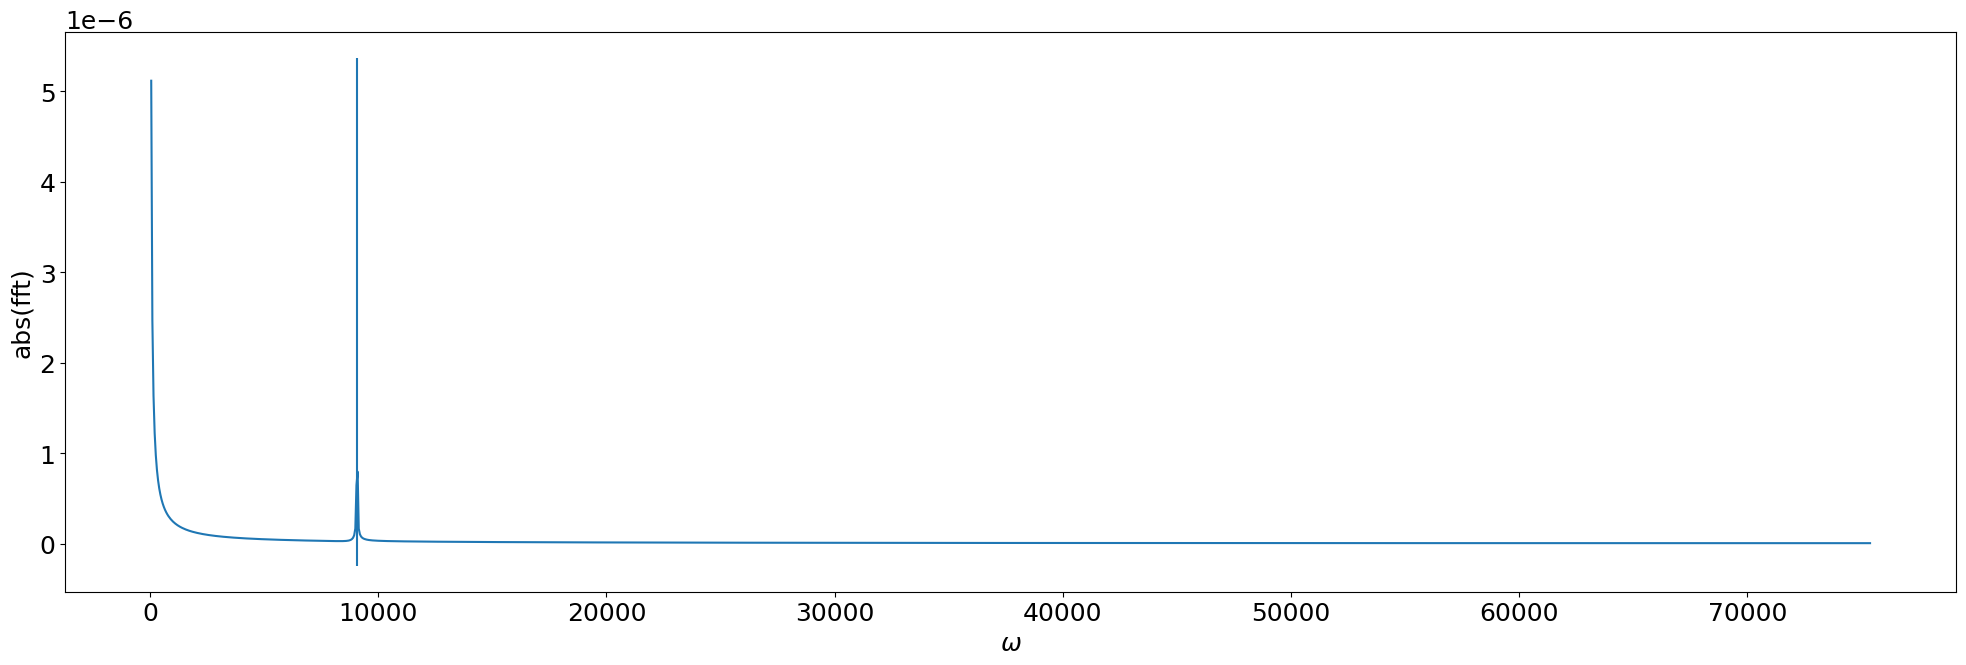

In [47]:
fft = np.fft.rfft(x_specific)[1:]
freq_omega = 2*np.pi*np.fft.rfftfreq(x_specific.shape[-1], d=t[1]-t[0])[1:]

fig, ax = plt.subplots(figsize=(20,7))
ax.set_xlabel(r"$\omega$")
ax.set_ylabel("abs(fft)")
ax.plot(freq_omega, abs(fft))
ax.tick_params(axis='y')

fig.tight_layout()

# Value found underneath
plt.vlines(9064, *ax.get_ylim())
plt.show()

We correct for the general trend with a moving average

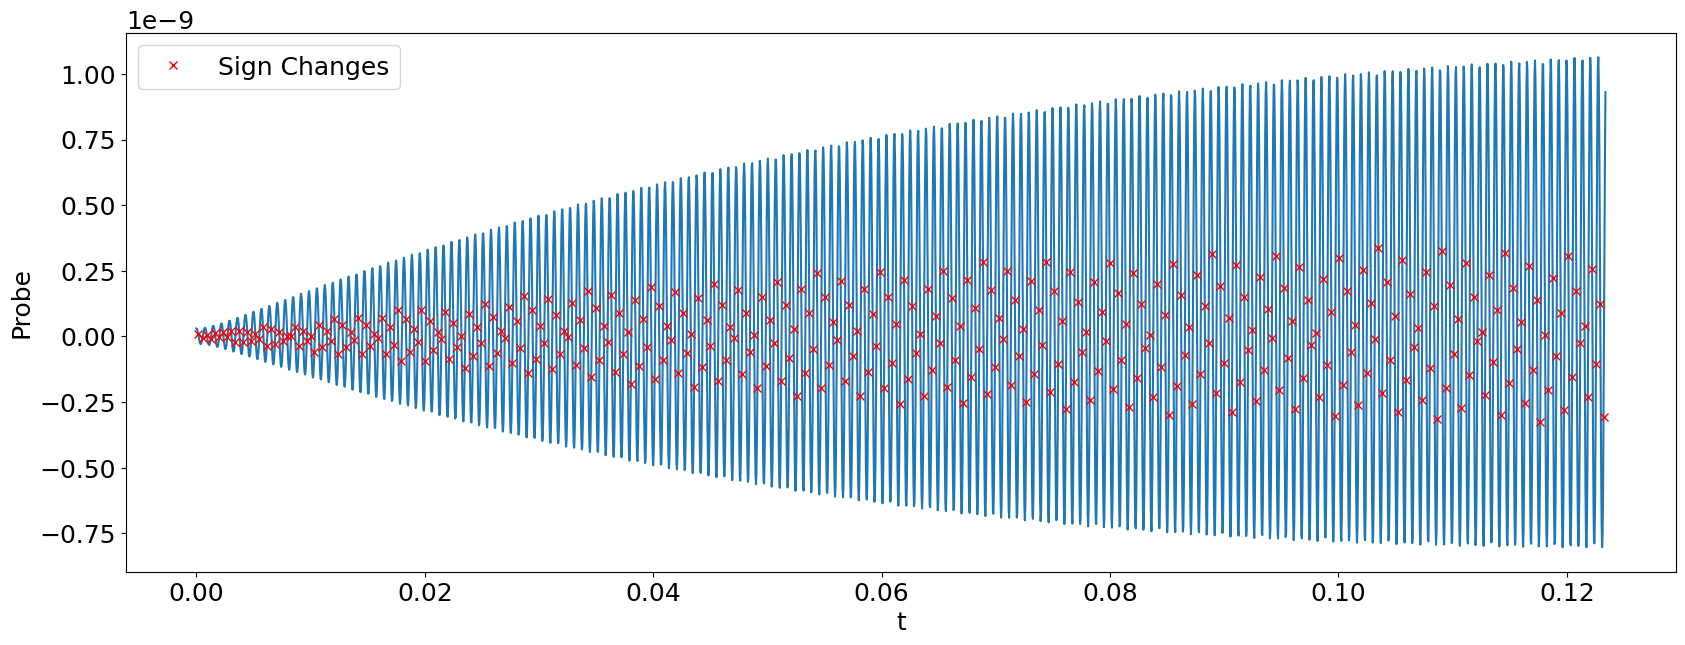

Frequency 9064.12780514266


In [48]:
w = 40  # Moving avg width
t_oscillation = t[0:-(w-1)]
x_avg = np.convolve(x_specific, np.ones(w), 'valid') / w  # Moving average

x_oscillation = x_specific[0:-(w-1)]-x_avg

sign_changing_mask = np.concatenate((np.array(abs(np.sign(x_oscillation)[:-1] - np.sign(x_oscillation)[1:])/2, dtype=bool), np.array([False])))  # Extra 0 to make dims work out

plt.figure(figsize=(20,7))
plt.plot(t_oscillation, x_oscillation)
plt.plot(t_oscillation[sign_changing_mask], x_oscillation[sign_changing_mask], 'rx', label='Sign Changes')
plt.xlabel("t")
plt.ylabel("Probe")
plt.legend()
plt.show()

t_difference = (np.roll(t_oscillation[sign_changing_mask], -1) - t_oscillation[sign_changing_mask])[:-1]

print("Frequency", np.pi/np.mean(t_difference))

There are two "sign changing points" for every oscillation

The period $T$ must then be approximately twice the difference between two points $d$.

and then the angular frequency is $\omega = \frac{2\pi}{T} = \frac{\pi}{d}$

This fits with the ones from rfftfreq()